In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

In [2]:
main_url = "https://www.newsbeast.gr/page/"

teaser_soups_list = []

for i in range(7, 11):
  page_url = main_url + str(i)
  page = requests.get(page_url)
  teaser_soup = BeautifulSoup(page.text, 'html.parser')
  print(f"Now Scraping page: {i}")
  teaser_soups_list.append(teaser_soup)
  time.sleep(2)

Now Scraping page: 7
Now Scraping page: 8
Now Scraping page: 9
Now Scraping page: 10


In [ ]:
#print(teaser_soup.prettify())

In [ ]:
teaser_soups_list[0].find_all('div', {'class': 'jsx-107431441 articleDisplay'})

In [5]:
teaser_soups_list[0].find('div', {'class': 'jsx-107431441 articleDisplay'}).find('h4').find('a').text

'Υπουργείο Εργασίας: Αυξήθηκαν οι εργαζόμενοι με μισθωτή εξαρτημένη σχέση εργασίας και οι μέσες μηνιαίες αποδοχές'

In [6]:
teaser_soups_list[0].find('div', {'class': 'jsx-107431441 articleDisplay'}).find('h4').find('a')['href']

'/financial/arthro/9760548/ypourgeio-ergasias-afxithikan-oi-ergazomenoi-me-misthoti-exartimeni-schesi-ergasias-kai-oi-meses-miniaies-apodoches'

In [7]:
teaser_soups_list[0].find('div', {'class': 'jsx-107431441 articleDisplay'}).find('a', {'class':'subtitle'}).text

'Σημαντική αύξηση των μέσων μηνιαίων αποδοχών κατά ποσοστό 14%'

In [8]:
teaser_soups_list[0].find('div', {'class': 'jsx-107431441 articleDisplay'}).find('time').text

'13/06/2023 17:08'

In [ ]:
teaser_articles_list = []
for teaser_soup in teaser_soups_list:
  teaser_articles = teaser_soup.find_all('div', {'class': 'jsx-107431441 articleDisplay'})
  for teaser_article in teaser_articles:
    teaser_article_dict = {}
    h4_a = teaser_article.find('h4').find('a')
    if h4_a:
      teaser_article_dict['Title'] = h4_a.text
      if ('https://') not in h4_a['href']:
        teaser_article_dict['Url'] = 'https://www.newsbeast.gr' + h4_a['href']
      else :
        teaser_article_dict['Url']= h4_a['href']
      lead = teaser_article.find('a')
      all=requests.get(teaser_article_dict['Url'])
      all_ar=BeautifulSoup(all.text, 'html.parser')
      whole_ar=all_ar.find('div',{'class':'jsx-2277262082'})
      if whole_ar:
        whole_ar=whole_ar.text
      teaser_article_dict['Article_content']=whole_ar
    if lead:
      teaser_article_dict['Lead'] = lead.text
    section = teaser_article.find('a', {'class': 'category'})
    if section:
      teaser_article_dict['Section'] = section.text
    datetime = teaser_article.find('time')
    if datetime:
      teaser_article_dict['Datetime'] = datetime.text
    teaser_articles_list.append(teaser_article_dict)

# Δημιουργία του dataframe
news_beast_teaser_articles_df = pd.DataFrame(teaser_articles_list)
news_beast_teaser_articles_df.to_csv("news.csv", index=False)
news_beast_teaser_articles_df

In [10]:
#!python -m spacy download el_core_news_sm

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import datetime as Datetime

from google.colab import drive
drive.mount('gdrive')

Mounted at gdrive


In [12]:
pd.set_option('display.max_colwidth', None)

In [ ]:
news_beast_teaser_articles_df = pd.read_csv("news.csv")
news_beast_teaser_articles_df

In [ ]:
print(news_beast_teaser_articles_df.shape)
print(f"dtype of 'Datetime' is: {news_beast_teaser_articles_df.Datetime.dtypes}. To θέλουμε σε datetime64[ns]") #
news_beast_teaser_articles_df.head(1)


In [ ]:
news_beast_teaser_articles_df.dtypes

In [ ]:
news_beast_teaser_articles_df[news_beast_teaser_articles_df['Datetime'].str.contains('Upd')]

In [17]:
news_beast_teaser_articles_df['Datetime']=news_beast_teaser_articles_df['Datetime'].str.replace('Upd: ', '')

In [18]:
news_beast_teaser_articles_df['Datetime'] = pd.to_datetime(news_beast_teaser_articles_df.Datetime , format='%d/%m/%Y %H:%M')

In [ ]:
news_beast_teaser_articles_df.dtypes

In [ ]:
# Make a dataframe with selected columns only
news_beast_articles_df = news_beast_teaser_articles_df[['Article_content','Datetime']]

# Extract year, month and day from daytime
news_beast_articles_df['year'] = pd.DatetimeIndex(news_beast_articles_df['Datetime']).year
news_beast_articles_df['month'] = pd.DatetimeIndex(news_beast_articles_df['Datetime']).month
news_beast_articles_df['day'] = pd.DatetimeIndex(news_beast_articles_df['Datetime']).day
news_beast_articles_df['hour'] = pd.DatetimeIndex(news_beast_articles_df['Datetime']).hour
# View dataframe info
print(news_beast_articles_df.info())
news_beast_articles_df.head()

In [21]:
#Άσκηση με site μου

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

In [23]:
from wordcloud import WordCloud, STOPWORDS
import spacy

In [24]:
cv = CountVectorizer()

In [25]:
nlp=spacy.load('el_core_news_sm')

In [26]:
news_beast_articles_df = news_beast_articles_df.dropna()

In [27]:
count_vector = cv.fit_transform(news_beast_articles_df['Article_content'])

In [28]:
count_vector.shape

(179, 12088)

In [29]:
cv = CountVectorizer(stop_words= list(nlp.Defaults.stop_words))

In [30]:
count_vector = cv.fit_transform(news_beast_articles_df['Article_content'])

In [31]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())

results.head()

,00,000,0000,0020,01,02,03,030,032,04,...,ύφος,ύψη,ύψιστης,ύψος,ύψους,ώρα,ώρες,𝐌𝐞𝐫𝐦𝐢𝐠𝐤𝐚𝐬,𝐓𝐳𝐢𝐭𝐳𝐢𝐤𝐚𝐬,𝔊𝔯𝔦𝔪𝔢𝔰
0,0,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
cv = CountVectorizer(stop_words= list(nlp.Defaults.stop_words), min_df=0.01, max_df=0.95)

In [33]:
count_vector = cv.fit_transform(news_beast_articles_df['Article_content'])

In [ ]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())

results.head()

In [ ]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20)
count_vector = cv.fit_transform(news_beast_articles_df['Article_content'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()


In [36]:

cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20, ngram_range=(2, 2))
count_vector = cv.fit_transform(news_beast_articles_df['Article_content'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

,13 2023,https co,instagram post,june 13,on instagram,pic twitter,post on,post shared,shared by,this post,twitter com,view this,απογευματινές ώρες,λοίμωξη στρεπτόκοκκο,μποφόρ θερμοκρασία,νέα δημοκρατία,νέας δημοκρατίας,στρεπτόκοκκο ομάδας,στρεπτόκοκκος ομάδας,τοπικές βροχές
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,10,6,0


In [ ]:
results.sum(axis =0).sort_values(ascending = False)

In [38]:
sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False).head()


στρεπτόκοκκο ομάδας     39
στρεπτόκοκκος ομάδας    24
νέα δημοκρατία          18
λοίμωξη στρεπτόκοκκο    16
13 2023                 14
dtype: int64

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [40]:
tfidf_vectorizer = TfidfVectorizer(stop_words= list(nlp.Defaults.stop_words), max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(news_beast_articles_df['Article_content'])

In [41]:
results = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
results.head()


,00,000,06,10,100,11,12,13,14,15,...,χρόνια,χρόνο,χρόνου,χώρα,χώρας,χώρες,χώρο,όμπερχολτζερ,ώρα,ώρες
0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.069391,0.064859,0.238406,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
1,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.185148,0.0,0.0,0.0,0.000000
2,0.182602,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.153836,0.0,...,0.000000,0.0,0.197924,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
3,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.090329,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.124453
4,0.000000,0.0,0.0,0.044212,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.018546,0.0,0.000000,0.0,0.0,0.060322,0.0,0.0,0.0,0.000000


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train[0:1], tfidf_matrix_train))

In [43]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)

<Axes: >

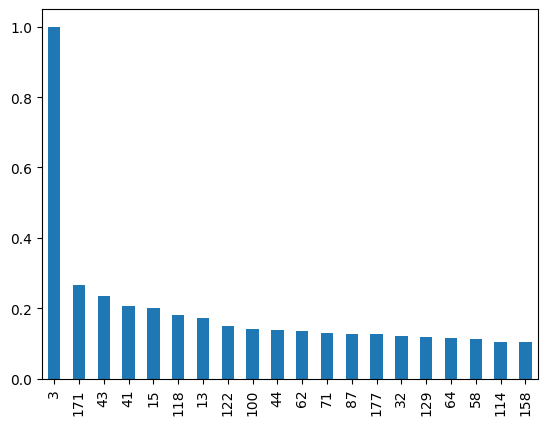

In [44]:
pd.DataFrame(arr).loc[3].sort_values(ascending = False).head(20).plot(kind = 'bar')

In [45]:
news_beast_articles_df['Article_content'].loc[3]

'\nΣάλος έχει ξεσπάσει στη «Πλεύση Ελευθερίας» μετά τις αναφορές ότι η Ζωή Κωνσταντοπούλου κόβει υποψηφίους για να βάλει σε εκλόγιμες θέσεις στενά της πρόσωπα και αρκετοί αναρωτιούνται για τον ηθοποιό σύντροφο της, που έγινε γνωστός στο ευρύ κοινό από τη σειρά «Κωνσταντίνου και Ελένης».\nΣυγκεκριμένα, τοποθέτησε σε εκλόγιμη θέση τον Διαμαντή Καραναστάση, τη στιγμή που δεν συμμετείχε στις εκλογές της 21ης Μαΐου, ενώ στις κάλπες του 2019 είχε πάρει μεν μέρος με την παράταξη της συντρόφου του, αλλά είχε απογοητεύσει με την επίδοση του.\nΣύμφωνα με την εκπομπή «Live News», ο σύντροφος της Ζωής Κωνσταντοπούλου γεννήθηκε στη Λάρισα και έχει αποκτήσει δύο παιδιά. Είναι ηθοποιός του θεάτρου και της τηλεόρασης, ωστόσο στο ευρύ κοινό έγινε γνωστός από τη σειρά «Κωνσταντίνου και Ελένης», ενώ μετά συμμετείχε και στο «Λίφτινγκ»\n«Και για μένα είναι τόσο περίεργο να έχω κάνει τόσα πράγματα και στο θέατρο και σε όλα αυτά, και να λένε “ο γιατρός από το Κωνσταντίνου και Ελένη”», έχει πει χαρακτηριστικά

In [46]:
import seaborn as sns

In [47]:
arr = cosine_similarity(tfidf_matrix_train[0:10], tfidf_matrix_train[0:10])

<Axes: title={'center': 'Βαθμός ομοιότητας των 10 πρώτων άρθρων'}>

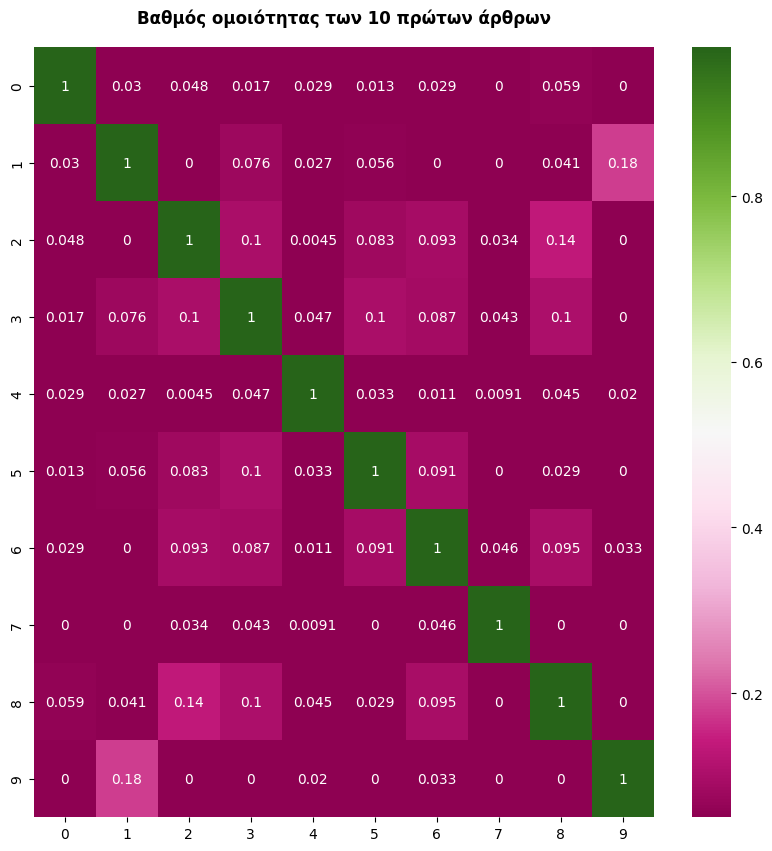

In [48]:

plt.figure(figsize=(10, 10))
#annot = True to print the values inside the square
plt.title('Βαθμός ομοιότητας των 10 πρώτων άρθρων', y=1.02, fontweight='bold') # το y ορίζει την απόσταση του τίτλου από το γράφημα
sns.heatmap(data=arr, annot=True, vmin=0.05, vmax=0.98, cmap="PiYG")


In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#2o site

In [58]:
ertnews_df=pd.read_csv('/content/ertnews.gr-MAY23.csv')

In [ ]:
short_ertnews_df= ertnews_df[['date','text']]
short_ertnews_df.head()

In [ ]:
short_ertnews_df['year']=pd.DatetimeIndex(short_ertnews_df['date']).year
short_ertnews_df['month']=pd.DatetimeIndex(short_ertnews_df['date']).month
short_ertnews_df['day']=pd.DatetimeIndex(short_ertnews_df['date']).day

In [61]:
cv1 = CountVectorizer()

In [62]:
count_vector1 = cv.fit_transform(short_ertnews_df['text'])

In [63]:
count_vector1.shape

(4880, 20)

In [64]:
results = pd.DataFrame(count_vector1.toarray(), columns=cv.get_feature_names_out())

results.head()

,00 14,00 15,08 30,09 00,09 30,14 00,15 00,21ης μαΐου,30 15,αλέξης τσίπρας,απε μπε,εκατ ευρώ,κυριάκος μητσοτάκης,μαΐου 2023,νέα δημοκρατία,νέας δημοκρατίας,πηγές απε,πηγή απε,προεκλογική εκστρατεία,προεκλογικής περιόδου
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [65]:
cv1= CountVectorizer(stop_words= list(nlp.Defaults.stop_words))

In [66]:
  count_vector1 = cv.fit_transform(short_ertnews_df['text'])

In [ ]:
results1 = pd.DataFrame(count_vector1.toarray(), columns=cv.get_feature_names_out())

results.head()

In [68]:
cv1 = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20)
count_vector1 = cv1.fit_transform(short_ertnews_df['text'])
results1 = pd.DataFrame(count_vector1.toarray(), columns=cv1.get_feature_names_out())
results1.head()


,00,15,2023,30,δήλωσε,δύο,είπε,εκλογές,ελλάδα,ευρώ,κυβέρνηση,μαΐου,νέα,πηγή,πρόεδρος,σήμερα,συριζα,σύμφωνα,χρόνια,χώρα
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0


In [69]:
results1.sum(axis =0).sort_values(ascending = False)

00           3627
30           2530
σήμερα       2502
δύο          2326
συριζα       2323
είπε         2318
σύμφωνα      2258
εκλογές      2137
χώρα         2039
κυβέρνηση    1983
δήλωσε       1887
πρόεδρος     1883
ελλάδα       1883
νέα          1857
ευρώ         1844
μαΐου        1822
15           1797
χρόνια       1755
2023         1725
πηγή         1514
dtype: int64

In [70]:
sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False).head()

απε μπε                1145
15 00                   910
09 00                   892
κυριάκος μητσοτάκης     797
00 15                   648
dtype: int64

In [71]:
tfidf_vectorizer = TfidfVectorizer(stop_words= list(nlp.Defaults.stop_words), max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(short_ertnews_df['text'])  #finds the tfidf score with normalization


results1 = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
results1.head()

,00,000,05,08,09,10,100,11,12,13,...,χρόνια,χρόνο,χωρών,χώρα,χώρας,χώρες,χώρο,ψηφίσουν,ώρα,ώρες
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.199178,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [72]:
from sklearn.metrics.pairwise import cosine_similarity

print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train[0:1], tfidf_matrix_train))

cosine scores ==>  [[1.         0.11015748 0.06428154 ... 0.11354074 0.07140758 0.06260056]]


In [73]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)

<Axes: >

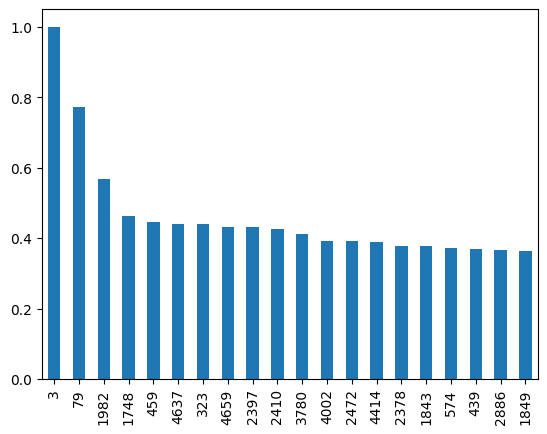

In [74]:
pd.DataFrame(arr).loc[3].sort_values(ascending = False).head(20).plot(kind = 'bar')

In [75]:
short_ertnews_df['text'].loc[3]


'Ολοσχερώς καταστράφηκε καφετέρια στην Αρτέμιδα μετά από πυρκαγιά που ξέσπασε μετά τις 4 τα ξημερώματα στην Λεωφόρο Αρτέμιδος. Στο σημείο επιχείρησαν 20 πυροσβέστες με 6 οχήματα, ενώ τα αίτια του συμβάντος διερευνά το ανακριτικό τμήμα της Πυροσβεστικής .'

<Axes: title={'center': 'Βαθμός ομοιότητας των 10 πρώτων άρθρων'}>

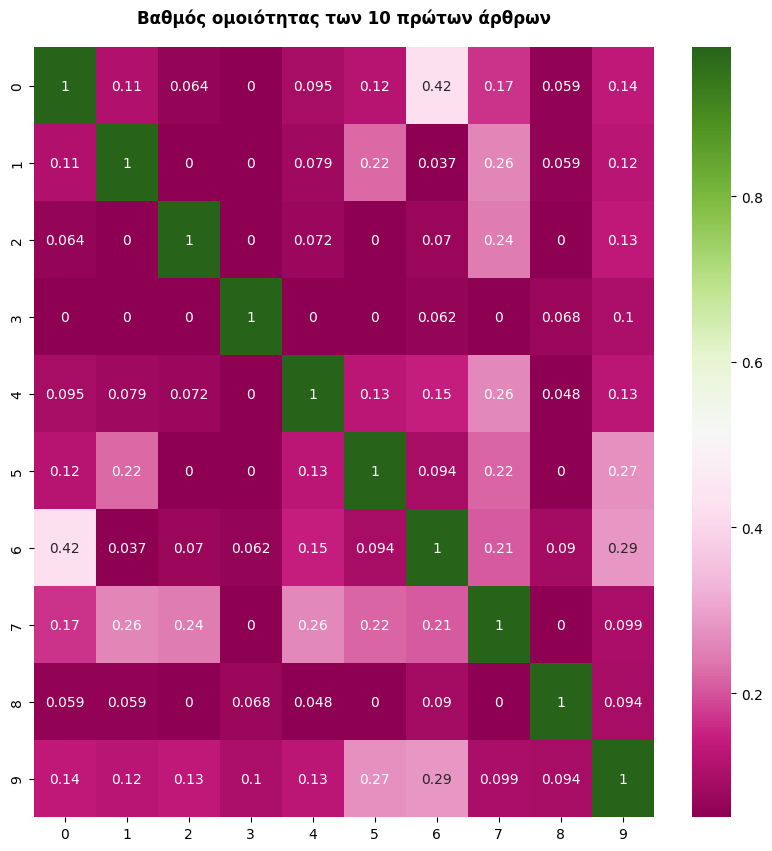

In [76]:
arr = cosine_similarity(tfidf_matrix_train[0:10], tfidf_matrix_train[0:10]) # συγκρίνουμε τα 10 πρώτα άρθρα μεταξύ τους


plt.figure(figsize=(10, 10))
# annot = True to print the values inside the square
plt.title('Βαθμός ομοιότητας των 10 πρώτων άρθρων', y=1.02, fontweight='bold') # το y ορίζει την απόσταση του τίτλου από το γράφημα
sns.heatmap(data=arr, annot=True, vmin=0.05, vmax=0.98, cmap="PiYG")


In [ ]:
#3o

In [79]:
newsbeast_text = news_beast_articles_df['Article_content'].str.cat(sep = ' ')

In [80]:
ert_text = short_ertnews_df['text'].str.cat(sep=' ')


In [82]:
two_sites_list = [] # make a list to put in the dictionaries that are created below
newsbeastD = {'site' : 'newsbeast.gr', 'text' : 'newsbeast_text'} # make a dictionary for efsyn
two_sites_list.append(newsbeastD) # add the dictionary to the list
ertD = {'site' : 'ert.gr', 'text' : 'ert_test'} # create a dictionary for skai
two_sites_list.append(ertD) # add the dictionary to the list
two_sites_df = pd.DataFrame(two_sites_list) # create a dataframe from the list with the two dictionaries

In [84]:
tfidf_vectorizer = TfidfVectorizer(stop_words= list(nlp.Defaults.stop_words), max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(two_sites_df['text'])


In [85]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)

([<matplotlib.axis.YTick at 0x7f95094f3af0>,
 [Text(0, 0, 'newsbeast.gr'), Text(0, 1, 'ert.gr')])

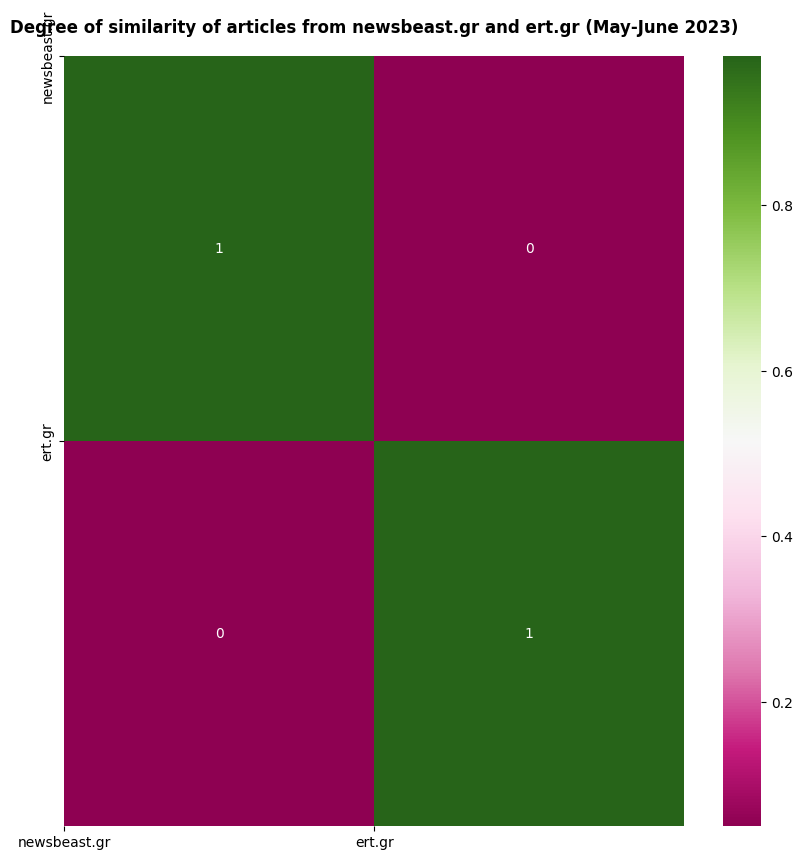

In [92]:
plt.figure(figsize=(10, 10))
plt.title('Degree of similarity of articles from newsbeast.gr and ert.gr (May-June 2023)', y=1.02, fontweight='bold')
sns.heatmap(data=arr, annot=True, vmin=0.05, vmax=0.98, cmap="PiYG")
plt.xticks([0, 1], ['newsbeast.gr', 'ert.gr'])
plt.yticks([0, 1], ['newsbeast.gr', 'ert.gr'])